## Observations and Insights 

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataframe
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [238]:
# Checking the number of mice.
merged_data.shape[0]

1893

In [239]:
# Display the number of unique mice IDs in the data
unique_mouse_ids = merged_data["Mouse ID"].nunique()
print(f"There are {unique_mouse_ids} unique mouse IDs in the data.")

There are 249 unique mouse IDs in the data.


In [240]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [241]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_ids = merged_data.loc[merged_data["Mouse ID"].isin(duplicate_mouse_ids), :]
all_duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [242]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [243]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_data['Mouse ID'].nunique()
print(f"There are {number_of_mice} unique mice in the clean data.")

There are 248 unique mice in the clean data.


## Summary Statistics

In [244]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data = clean_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume(tv). 
tv_mean = drug_regimen_data['Tumor Volume (mm3)'].mean()
tv_median = drug_regimen_data['Tumor Volume (mm3)'].median()
tv_variance = drug_regimen_data['Tumor Volume (mm3)'].var()
tv_std = drug_regimen_data['Tumor Volume (mm3)'].std()
tv_sem = drug_regimen_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'Mean': tv_mean, 'Median': tv_median, 'Variance': tv_variance, 'Standard Deviation': tv_std, 'SEM': tv_sem})
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [245]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total number of Timepoints')

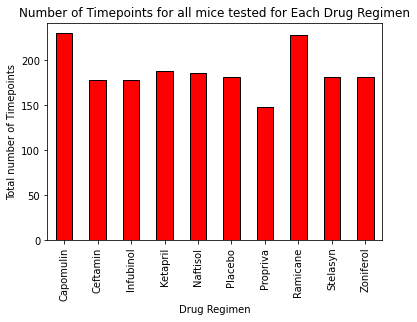

In [261]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice_timepoints = clean_data.groupby(['Drug Regimen']).count()['Timepoint']
all_mice_timepoints_plt = all_mice_timepoints.plot(kind='bar', color='red',edgecolor='black')
all_mice_timepoints_plt.set_title('Number of Timepoints for all mice tested for Each Drug Regimen')
all_mice_timepoints_plt.set_xlabel('Drug Regimen')
all_mice_timepoints_plt.set_ylabel('Total number of Timepoints')

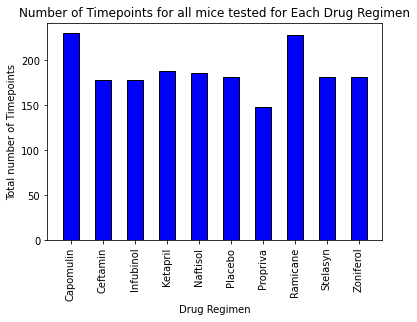

In [263]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
all_mice_timepoints = clean_data.groupby(['Drug Regimen']).count()['Timepoint']
plt.bar(all_mice_timepoints.index, all_mice_timepoints,color='blue', edgecolor='black',width=0.5)
plt.title('Number of Timepoints for all mice tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of Timepoints')
plt.xticks(all_mice_timepoints.index,rotation = 'vertical')
plt.show()

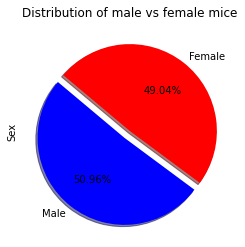

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_data['Sex'].value_counts()
colors = ["blue","red"]
explode= (0.1,0)
plot = male_female.plot(kind = "pie",colors=colors,autopct = "%1.2f%%",explode=explode,shadow = True, startangle = 140,title = "Distribution of male vs female mice")

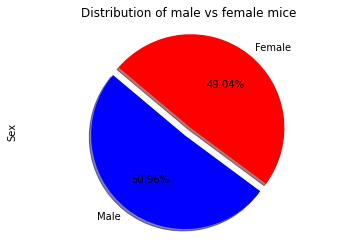

In [267]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = clean_data['Sex'].value_counts()
labels = ["Male","Female"]
colors = ["blue","red"]
explode= (0.1,0)
plt.pie(male_female, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%",shadow=True, startangle=140)
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Distribution of male vs female mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [277]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(greatest_timepoint, clean_data, on=['Mouse ID','Timepoint'])
last_timepoint_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']]

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a262,45,70.717621
3,a275,45,62.999356
4,a366,30,63.440686
...,...,...,...
243,z435,10,48.710661
244,z578,45,30.638696
245,z581,45,62.754451
246,z795,45,65.741070


In [326]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   

# Locate the rows which contain mice on each drug and get the tumor volumes 
for treatment in treatments:
    treatment_df = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_df)
tumor_vol_data    

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
11     57.031862
13     66.0830

In [339]:
# Determine outliers using upper and lower bounds
quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = last_timepoint_df.loc[ (last_timepoint_df['Tumor Volume (mm3)'] < lower_bound) |(last_timepoint_df['Tumor Volume (mm3)'] > upper_bound)]
outliers

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
96,k403,45,Ramicane,Male,21,16,22.050126,1
174,s185,45,Capomulin,Female,3,17,23.343598,1


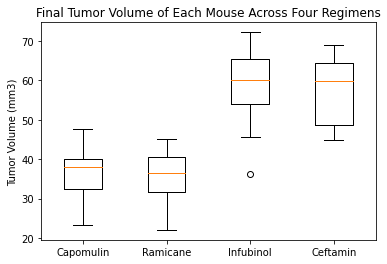

In [340]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# using matplotlib.
plt.boxplot(tumor_vol_data)
plt.xticks([1,2,3,4],treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume of Each Mouse Across Four Regimens')
plt.show()

## Line and Scatter Plots

In [253]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [254]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [255]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
